### II. Data Visualizations and final wrangling

The aim of this notebook is to show some visualization of the existing data set.

The information is presented as follows:

1. General Data Exploration: Existing relationships between dataset
2. Label Exploration
    * Exploring relationships between label and numerical features
    * Exploring relationships between label and categorical features
    * Using Aesthetics to explore relationships between label and numerical/categorical features
3. Final data wrangling
    * Drop columns
    * Scale Data

Data is finally saved for training the model

    
 

In [1]:
# import libraries
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline
%matplotlib inline

In [2]:
#import data set modiied data set from file Data Preparation(train)
df=pd.read_csv('dfprepared.csv')
df.shape

(1399, 24)

#### 1.  General Data Exploration

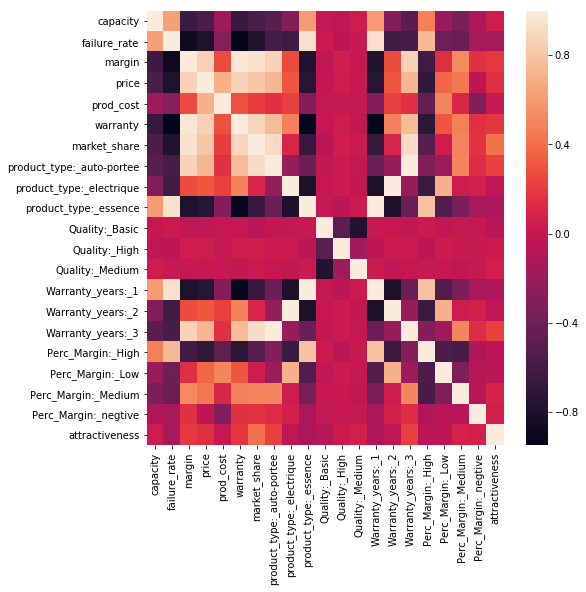

In [3]:
# Let's observe the existing correlations between dataset
plt.figure(figsize=(8,8)) 

sns.heatmap(df.corr())

This chart shows some very interesting correlations, such as product type and warranty, failure rate and product_type:essence, or failure_rate and warranty_years_1


#### 2. Label Exploration

In [4]:
## Descriptive statistics for label (in this case it will be attractiveness)
df.attractiveness.describe()

count    1399.000000
mean        0.636507
std         0.124016
min         0.297384
25%         0.549369
50%         0.641351
75%         0.726746
max         0.952877
Name: attractiveness, dtype: float64

From the describe statistics, it looks like data follows a normal distribution shape, we'll check it soon

(array([ 12.,  15.,  44.,  80.,  95., 137., 170., 173., 168., 185., 131.,
         91.,  65.,  29.,   4.]),
 array([0.2973839 , 0.34108344, 0.38478298, 0.42848252, 0.47218206,
        0.5158816 , 0.55958114, 0.60328068, 0.64698022, 0.69067976,
        0.73437929, 0.77807883, 0.82177837, 0.86547791, 0.90917745,
        0.95287699]),
 <a list of 15 Patch objects>)

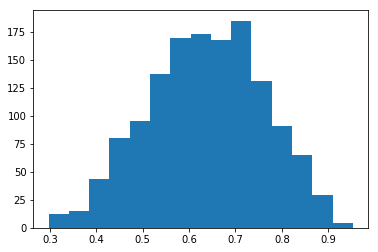

In [5]:
plt.hist(df.attractiveness,15)


Label histogram shows data for this column is slightly left-skewed, but overall it follows a normal distribution shape.

In [6]:
df.head(2)

,capacity,failure_rate,margin,price,prod_cost,product_type,quality,warranty,market_share,product_type:_auto-portee,...,Quality:_Medium,Warranty_years:_1,Warranty_years:_2,Warranty_years:_3,Perc_margin,Perc_Margin:_High,Perc_Margin:_Low,Perc_Margin:_Medium,Perc_Margin:_negtive,attractiveness
0,10.492623,0.042528,633.766584,828.802103,195.035519,auto-portee,Basic,3,0.00636,1,...,0,0,0,1,Medium,0,0,1,0,0.650648
1,20.273730,0.037896,731.576817,882.894916,151.318099,auto-portee,Basic,3,0.00684,1,...,0,0,0,1,Medium,0,0,1,0,0.699792


#### 2.1 Exploring relationships between label and numerical features

C:\Users\Florence\Anaconda333\envs\xebiamow\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


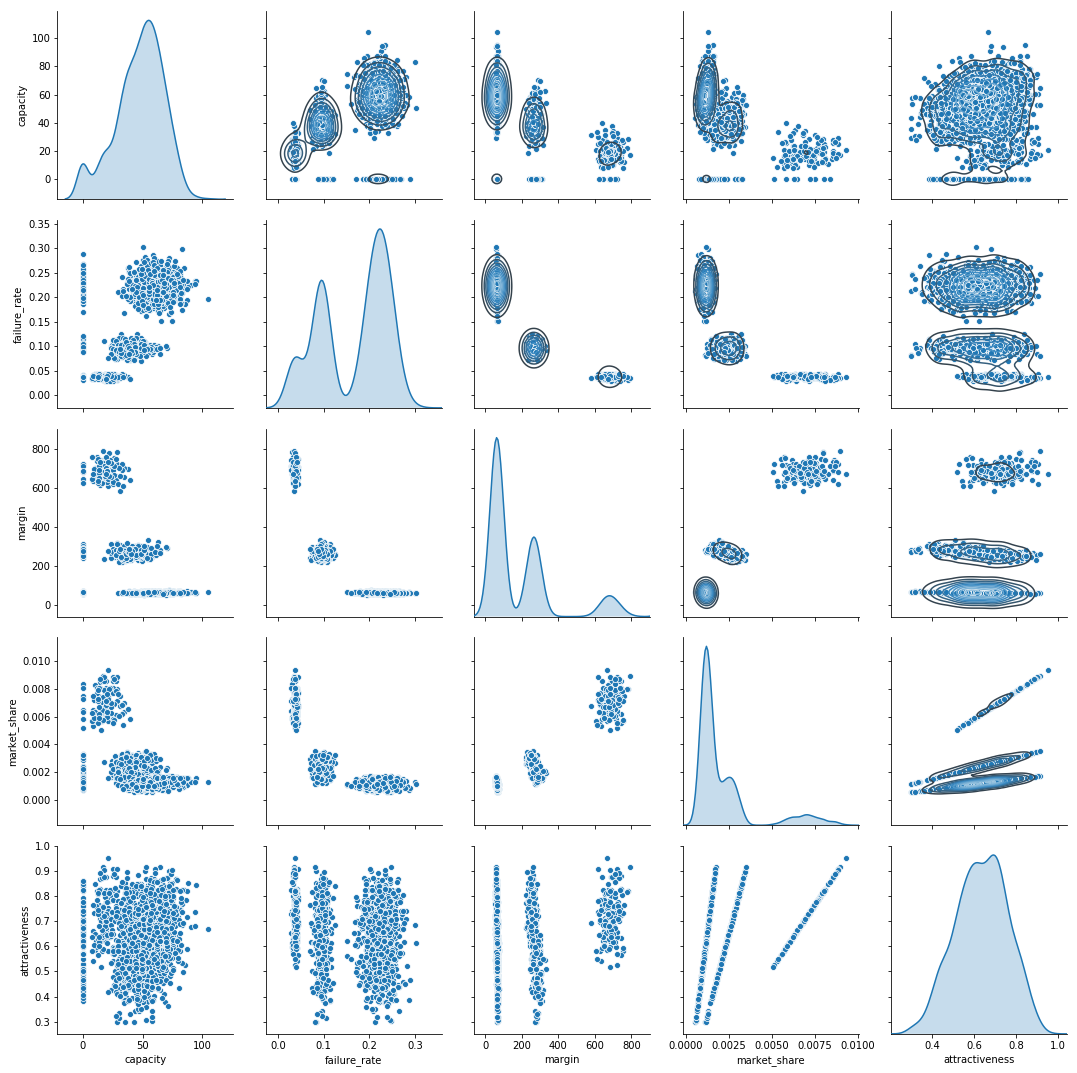

In [7]:
## Create scatter-plot matrix of most important correlations with the label

num_cols1 = ["capacity", "failure_rate",
            "margin", "market_share","attractiveness"] 
sns.pairplot(df[num_cols1], diag_kind="kde", size=3).map_upper(sns.kdeplot, cmap="Blues_d")

Clearly plots above show us data follows very distinct patterns within each plot. 3 different patterns can be identified almost within each plot, probably belonging to the product_type. We shall understand better these correlations with the label when checking the correlations of categorical features with the label.

#### 2.2 Exploring relationships between label and categorical features

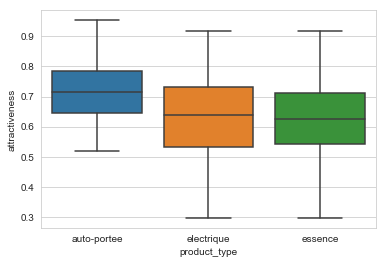

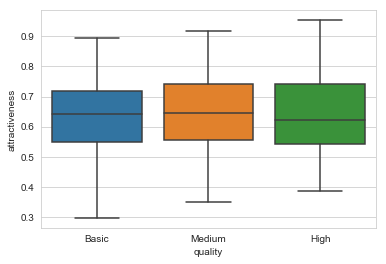

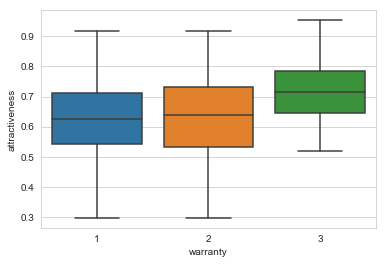

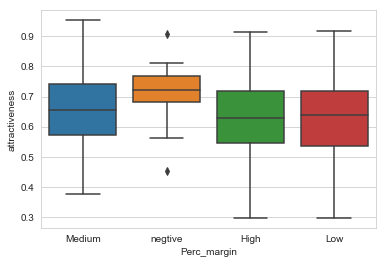

In [8]:
def plot_box(df, cols, col_y='attractiveness'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()
        
cat_cols = ['product_type','quality','warranty','Perc_margin']
plot_box(df, cat_cols)   

When observing the relationship between the label and the categorical variables, we can see that

*  **Perc_margin** shows that, besides the obvious fact that negative percentage is attractive, attractiveness of 
     products is similar regardless of the perc_margin (see their medians are very similar)
* **Warranty** is a key factor when it comes to determine attractiveness, as it increases along with the years of warranty
* **Quality** is not a keyfactor to deterine attractiveness, since the medians of each category are quite similar
* **Product_type** clearly determines the attractivness, being the "auto portee" type the most attractive, and the other two 
    categories presenting a similar level of attractivness.
    

#### 2.3 Using Aesthetics to explore relationships between label and numerical/categorical features

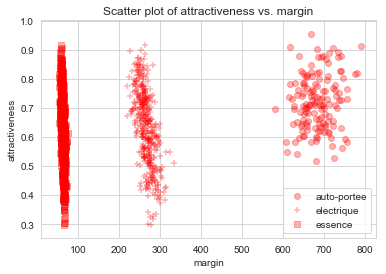

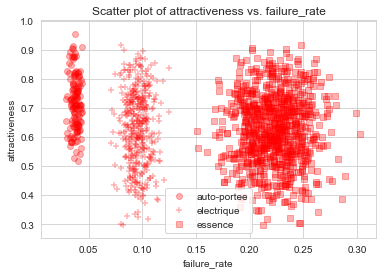

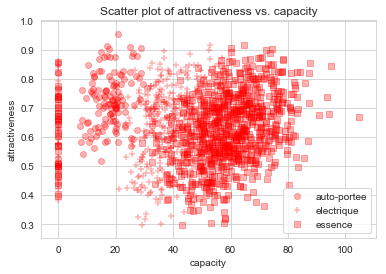

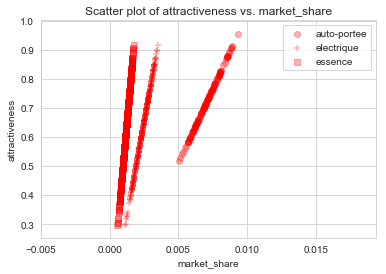

In [9]:
def plot_scatter_shape(df, cols, shape_col = 'product_type', col_y = 'attractiveness', alpha = 0.3):
    shapes = ['o', '+', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = df[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = df[df[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'red')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['margin','failure_rate','capacity','market_share']
plot_scatter_shape(df, num_cols) 

Using aesthetics, we can visualize and better understand data:

These plots show clearly how each **product_type** behaves in terms of attractiveness depending on:
    - Margin
    - Failure Rate
    - Capacity
    - Market share
    
    

#### 3. Final Data Wrangling

3.1 Drop columns we have turned into categorical and created dummies for each category

In [10]:
# Drop columns 
df=df.drop(['product_type', 'quality', 'warranty','Perc_margin'], axis=1)

3.2 Scale data


In [11]:
quant_features = ['market_share', 'capacity', 'prod_cost', 'failure_rate', 'price','margin']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = df[each].mean(), df[each].std()
    scaled_features[each] = [mean, std]
    df.loc[:, each] = (df[each] - mean)/std

In [12]:
df.head()

,capacity,failure_rate,margin,price,prod_cost,market_share,product_type:_auto-portee,product_type:_electrique,product_type:_essence,Quality:_Basic,Quality:_High,Quality:_Medium,Warranty_years:_1,Warranty_years:_2,Warranty_years:_3,Perc_Margin:_High,Perc_Margin:_Low,Perc_Margin:_Medium,Perc_Margin:_negtive,attractiveness
0,-1.873473,-1.683579,2.342817,2.187839,0.911872,2.354674,1,0,0,1,0,0,0,0,1,0,0,1,0,0.650648
1,-1.380486,-1.746504,2.854882,2.395929,0.583018,2.622993,1,0,0,1,0,0,0,0,1,0,0,1,0,0.699792
2,-1.384683,-1.729999,2.905358,2.536190,0.784759,2.253561,1,0,0,1,0,0,0,0,1,0,0,1,0,0.632129
3,-1.030374,-1.700220,2.450083,2.142765,0.669609,3.228693,1,0,0,1,0,0,0,0,1,0,0,1,0,0.810730
4,-1.577196,-1.745936,2.705769,2.248541,0.509065,2.938690,1,0,0,0,0,1,0,0,1,0,0,1,0,0.757614


Now data is ready for modeling, we save the data set and move on with the next Juypter Notebook

In [13]:
#export data set to main directory to be used in a different jupyter notebook
df.to_csv("dfprepared2.csv", index=False)